# 1. Data Understanding and Cleaning

In [1]:
import pandas as pd #Library imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

I will be working on Heart Attack Analysis & Prediction Dataset.

Features Description
1. age - age in years

2. sex - sex ( 0 = female; 1 = male)

3. cp - chest pain type (0 = asymptomatic; 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain;)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (0 = hypertrophy ;1 = normal; 2 = having ST-T wave abnormality)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)

12. ca - number of major vessels (0-3) colored by fluoroscopy

13. thal - 1 = fixed defect; 2 = normal; 3 = reversible defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

I think the above data was collected to observe and analyze various factors that might affect the risk of suffering from heart attack.
The data can be used to answer following research questions:

a) Does aging result in increased rate of heart attack?

b) Does increase in cholestrol level in body have any effect towards experiencing a heart attack?

c) Does high blood pressure contribute towards high chance of having a heart attack?, etc..

In [2]:
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

The dataset contains 303 rows and 14 columns. Among 14 columns, the last one "output" signifies the chances of experiencing a heart attack.

The 'output' column contains 0 and 1. 0 meaning chance of having a heart attack is none and 1 meaning there's an abosolute chance. So We will be performing binary classification. We will be utlizing all the other 13 columns, to predict the output value.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no null values.

In [6]:
data.duplicated().sum()

1

In [7]:
data=data.drop_duplicates(keep="first")

checking and removing duplicated values in the dataset.

# 2. Data Analysis and Visualization

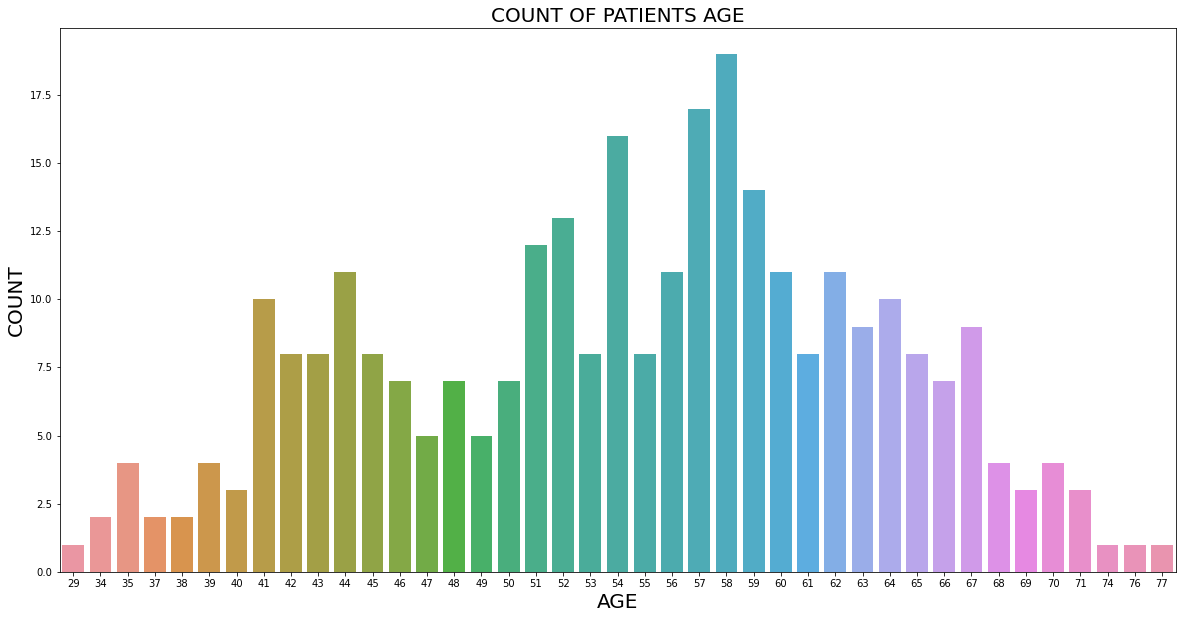

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["age"])
plt.title("COUNT OF PATIENTS AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

Visualizing Patient's Age and Heart Attack Chance.

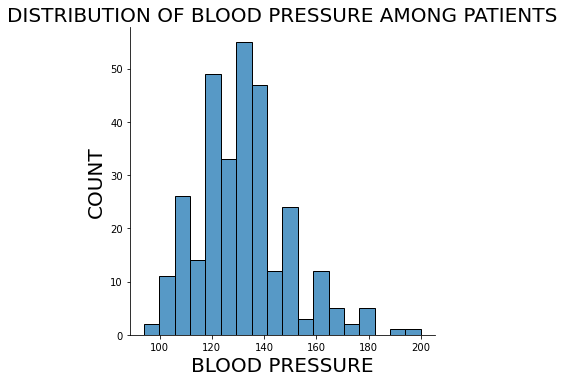

In [9]:
sns.displot(data["trtbps"])
plt.title("DISTRIBUTION OF BLOOD PRESSURE AMONG PATIENTS",fontsize=20)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

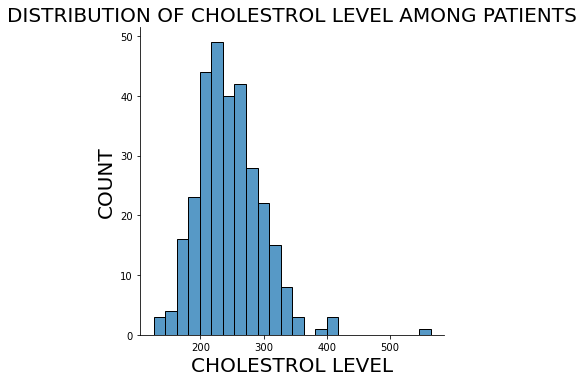

In [10]:
sns.displot(data["chol"])
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AMONG PATIENTS",fontsize=20)
plt.xlabel("CHOLESTROL LEVEL",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

Visualizing Cholestrol level and Heart Attack Chance.

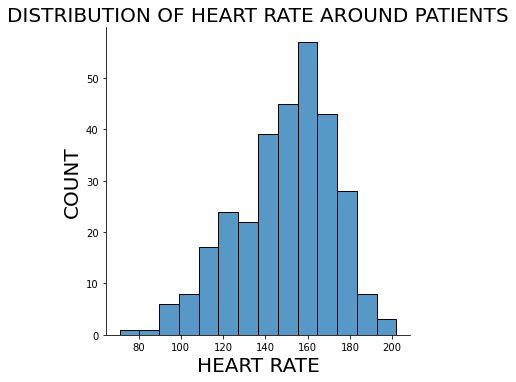

In [11]:
sns.displot(data["thalachh"])
plt.title("DISTRIBUTION OF HEART RATE AROUND PATIENTS",fontsize=20)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

Visualing Heart Rate and Heart Attack Chance

From visualizations, following conclusions can be drawn:-

a) Middle aged (40-65) people have higher risk of heart attack according to the dataset. Older people are indicated to have very minute chance compared to them. This might either be because of lack of data or Simply, age does not play any role.

b) People with high resting blood pressure, heart rate and cholestrol level has significantly high chance of having a heart attack.

# 3. Primary Model
## Separation of Features and Targets

In [12]:
X = data.iloc[:,0:-1]  # all rows, all the features and no labels
y = data.iloc[:,-1]  # all rows, label only

In [13]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

In [15]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X))

In [16]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,-1.485726,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.174856,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,-1.464866,-0.935208,0.478910,-0.106449,-0.418446,0.901657,-1.161988,1.431958,-0.727060,-0.645834,-0.714911,1.119967
298,-1.042904,0.682656,1.976470,-1.232023,0.338703,-0.418446,0.901657,-0.768384,-0.698344,0.135360,-0.645834,-0.714911,1.119967
299,1.503322,0.682656,-0.935208,0.707035,-1.035462,2.389793,0.901657,-0.374779,-0.698344,2.032684,-0.645834,1.274980,1.119967
300,0.285561,0.682656,-0.935208,-0.091401,-2.235438,-0.418446,0.901657,-1.511859,1.431958,0.135360,-0.645834,0.280034,1.119967


StandardScaler was used to perform the task of Standardization because the dataset contains variables that are different in scale. 
For e.g. The dataset contains 'age' column with values on scale 20-70 and 'cholestorl' column with values on scale 200 above.
As these two columns are different in scale, they are Standardized to reduce the distance between them and have common scale while building machine learning model.

## Train test split

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)

## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        25
           1       0.91      0.83      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [20]:
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
metrics.accuracy_score(y_test,y_test_pred)

0.8852459016393442

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)
dt=model.predict(X_test)
metrics.accuracy_score(y_test,dt)

0.819672131147541

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [25]:
model.fit(X_train,y_train)
rf=model.predict(X_test)
metrics.accuracy_score(y_test,rf)

0.8360655737704918

# 4. Cross Validation & Hyper Parameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [27]:
#KNN
param_grid = [{'n_neighbors':[1,5], 'p':[ 1, 2,3]}]

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,scoring='accuracy',cv=5)
knn_cv.fit(X_train,y_train)

print("Best parameters set found on train set:")
print(knn_cv.best_params_)
print(knn_cv.best_estimator_)
print()

print(knn_cv.score(X_test, y_test))

Best parameters set found on train set:
{'n_neighbors': 5, 'p': 1}
KNeighborsClassifier(p=1)

0.8852459016393442


In [28]:
param_grid = [{'n_neighbors':[1, 5], 'p':[1,2,3,4,5]}]

knn_cv = RandomizedSearchCV(
    KNeighborsClassifier(), param_grid, scoring='accuracy'
)
knn_cv.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(knn_cv.best_params_)
print(knn_cv.best_estimator_)
print()

print(knn_cv.score(X_test, y_test))

Best parameters set found on train set:
{'p': 1, 'n_neighbors': 5}
KNeighborsClassifier(p=1)

0.8852459016393442


In [29]:
#Decision Tree
dt = DecisionTreeClassifier()
params = {
    'max_depth': np.arange(1,20),
    'min_samples_leaf': [5, 10, 20, 50, 100],
     'criterion': ["gini", "entropy"]
}
dt_cv = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
dt_cv.fit(X_train, y_train)
print("Best parameters set found on train set:")
print(dt_cv.best_params_)
print(dt_cv.best_estimator_)
print()

print(dt_cv.score(X_test, y_test))

Fitting 4 folds for each of 190 candidates, totalling 760 fits
Best parameters set found on train set:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

0.8360655737704918


# 5. Feature Selection

In [30]:
features = data.iloc[:,:-1]
target = data.iloc[:,-1:]

In [31]:
features.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [32]:
# necessary imports:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features = SelectKBest(score_func=chi2, k=7)
fit = best_features.fit(features, target) # Run score function on (X, y) and get the appropriate features.
select_kbest = best_features.fit_transform(features, target)

In [33]:
select_kbest.dtype

dtype('float64')

In [34]:
# Storing features and there score value in dataframes:
dfscores = pd.DataFrame(fit.scores_)
dfcoloumns = pd.DataFrame(features.columns)
# Concat two dataframes for better visualization
features_scores = pd.concat([dfcoloumns, dfscores], axis = 1)
features_scores.columns = ["Features", "Scores"] # naming the dataframe Coloumns
# saving dataframe to csv
name = "feature_scores"
features_scores.to_csv(name)
features_scores.head()

,Features,Scores
0,age,22.210517
1,sex,7.721690
2,cp,62.116086
3,trtbps,15.094591
4,chol,21.690747


In [35]:
select_kbest = best_features.fit_transform(features, target)
index_kbest = best_features.get_support()
selected_features = features.loc[:,index_kbest]
selected_features

,age,cp,chol,thalachh,exng,oldpeak,caa
0,63,3,233,150,0,2.3,0
1,37,2,250,187,0,3.5,0
2,41,1,204,172,0,1.4,0
3,56,1,236,178,0,0.8,0
4,57,0,354,163,1,0.6,0
...,...,...,...,...,...,...,...
298,57,0,241,123,1,0.2,0
299,45,3,264,132,0,1.2,0
300,68,0,193,141,0,3.4,2
301,57,0,131,115,1,1.2,1


# 6. Final Model

In [36]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
selected_features=pd.DataFrame(scaler.fit_transform(selected_features))

In [37]:
X_train,X_test,y_train,y_test=train_test_split(selected_features,target,test_size=0.2,random_state=8)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.88      0.81      0.84        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



D:\softwares\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
knn_cv.fit(X_train, y_train)


D:\softwares\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\softwares\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\softwares\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\softwares\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

D:\softwares\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\softwares\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\softwares\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\softwares\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': [1, 5],
                                         'p': [1, 2, 3, 4, 5]}],
                   scoring='accuracy')

In [40]:
print(knn_cv.score(X_test, y_test))

0.819672131147541


In [41]:
dt_cv.fit(X_train, y_train)
dt_cv.score(X_test, y_test)

Fitting 4 folds for each of 190 candidates, totalling 760 fits


0.8360655737704918

In [42]:
# #Necessary Imports
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators=50)
# clf = clf.fit(features, target)
# clf.feature_importances_

In [43]:
# from sklearn.feature_selection import SelectFromModel
# model = SelectFromModel(clf, prefit=True)
# features_new = model.transform(features)

In [44]:
# features_new.shape

Feature selection using two methods gave the same result. So, only required feature selection was done and the selected faetures were applied in KNN.

# Conclusion

 Hyperparamter tuning got us slight improvement but when final model was constructed after hyperparameter tuning and feature selection, we got reduced accuracy. This might be because the feature selection helped reduce only the complexity of the model.

Among all the models used, KNN classification model with tuned hypermeters gave the hihgest accuracy which is equal to 0.88 followed by Hyperparameter tuned Decisiton Tree model with accuracy of 0.86.